In [2]:
import os, cv2, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation,ZeroPadding2D
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

Using TensorFlow backend.


# prepare data

In [3]:
train_dir = "F:\\kag\\CatAndDog\\train\\"
test_dir = "F:\\kag\\CatAndDog\\test\\"

row = 64
col = 64
channels = 3

train_image = [train_dir+i for i in os.listdir(train_dir)]
train_dog = [train_dir+i for i in os.listdir(train_dir) if 'dog' in i]
train_cat = [train_dir+i for i in os.listdir(train_dir) if 'cat' in i]

test_image = [test_dir+i for i in os.listdir(test_dir)]


#train_image = train_dog[:1000]+train_cat[0:1000]
random.shuffle(train_image)
#test_image = test_image[0:25]


def read_image(file_path):
    img = cv2.imread(file_path,cv2.IMREAD_COLOR)
    return cv2.resize(img,(row,col),interpolation=cv2.INTER_CUBIC)
    #return cv2.resize(img,(row,col))

def prep_data(images):
    count = len(images)
    data = np.ndarray((count,row,col,channels))
    
    
    for i,image_file in enumerate(images):
        image = read_image(image_file)
        data[i]=image
        if i%250 == 0 and i!=0:
            print("processed {} of {}".format(i,count))
            
    return data

train = prep_data(train_image)
test = prep_data(test_image)

print("Train shape:{}".format(train.shape))
print("Test shape:{}".format(test.shape))


processed 250 of 25000
processed 500 of 25000
processed 750 of 25000
processed 1000 of 25000
processed 1250 of 25000
processed 1500 of 25000
processed 1750 of 25000
processed 2000 of 25000
processed 2250 of 25000
processed 2500 of 25000
processed 2750 of 25000
processed 3000 of 25000
processed 3250 of 25000
processed 3500 of 25000
processed 3750 of 25000
processed 4000 of 25000
processed 4250 of 25000
processed 4500 of 25000
processed 4750 of 25000
processed 5000 of 25000
processed 5250 of 25000
processed 5500 of 25000
processed 5750 of 25000
processed 6000 of 25000
processed 6250 of 25000
processed 6500 of 25000
processed 6750 of 25000
processed 7000 of 25000
processed 7250 of 25000
processed 7500 of 25000
processed 7750 of 25000
processed 8000 of 25000
processed 8250 of 25000
processed 8500 of 25000
processed 8750 of 25000
processed 9000 of 25000
processed 9250 of 25000
processed 9500 of 25000
processed 9750 of 25000
processed 10000 of 25000
processed 10250 of 25000
processed 10500 o

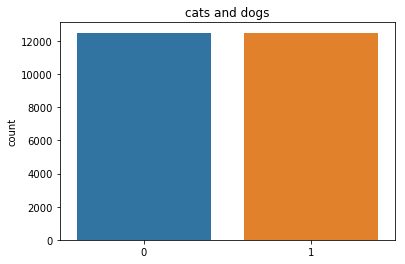

In [4]:
labels = []
for i in train_image:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)
sns.countplot(labels)
plt.title('cats and dogs')

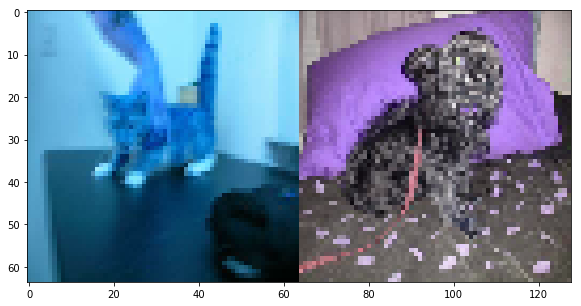

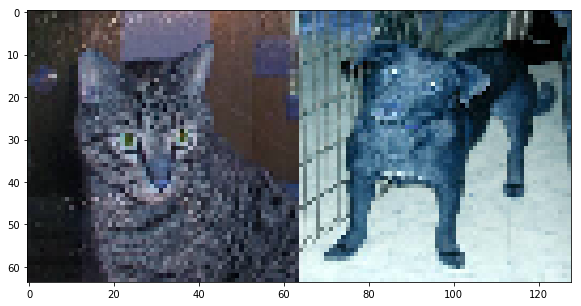

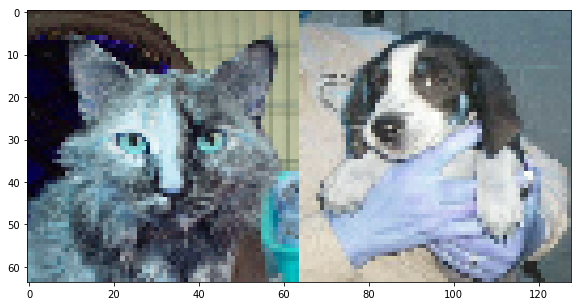

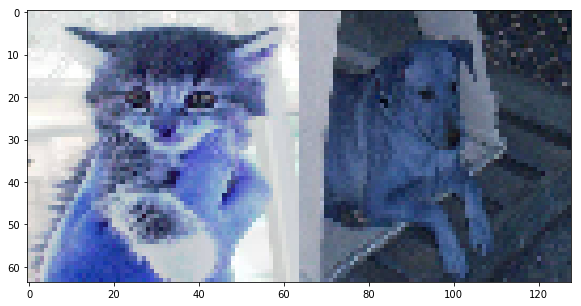

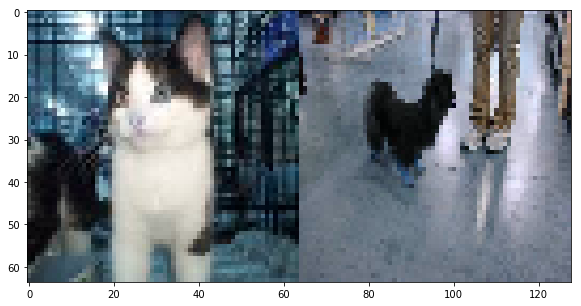

In [5]:
def show_cats_and_dogs(idx):
    cat = read_image(train_cat[idx])
    dog = read_image(train_dog[idx])
    pair = np.concatenate((cat,dog),axis=1)
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(5):
    show_cats_and_dogs(i)

In [6]:
from sklearn.model_selection import train_test_split
random_seed = 2
X_train,X_val,Y_train,Y_val = train_test_split(train,labels,test_size = 0.1,random_state = random_seed)
print(X_train.shape,X_val.shape)

(22500, 64, 64, 3) (2500, 64, 64, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.models import Model
def catdog():
    model = Sequential()  
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1',input_shape=(row,col,3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(4096, activation='relu', name='fc1'))
    model.add(Dense(4096, activation='relu', name='fc2'))
    model.add(Dense(1, activation='sigmoid', name='predictions'))
    
    model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy',metrics=['accuracy'])
    return model
model =catdog()

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 2
batch_size = 16

print(type(train),type(labels))
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
             validation_data=(X_val,Y_val), 
          verbose=1, 
          shuffle=True, 
          callbacks=[learning_rate_reduction])
    


<class 'numpy.ndarray'> <class 'list'>
Train on 22500 samples, validate on 2500 samples
Epoch 1/2
 2912/22500 [==>...........................] - ETA: 63334s - loss: 8.2400 - acc: 0.4852

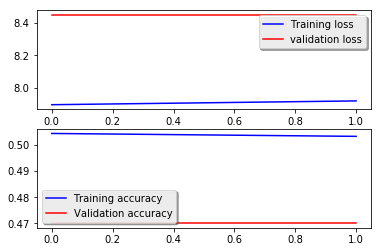

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)